<h2>Table of contents

<ul>
    
<li><b>Introduction
    
<li><b>Research Question
    
<li><b>Data Wrangling
    
<li><b>Exploratory_Data Analysis
    
<li><b>Feature Engineering
    
<li><b>Conclusion

### Islam Aljuneidi

##### Importing  Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # to ignore warnings
import datetime
%matplotlib inline


##### load first data set

In [2]:
#importing dataset (matches.csv) using pandas

df = pd.read_csv('matches.csv')
df.head() #for display first 5 rows

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
df.shape #shape of the data

(756, 18)

In [4]:
df.info() #overall info about the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
# Checking the count of missing values in dataset
df.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [6]:
#dropping umpire3 column as it contain missing values. here total rows are 756
df = df.drop(columns=["umpire3"],axis=1)

df.head(3) # for display bfirst 5 rows

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan


In [7]:
# now 7 missing values in 'city' and 4 in 'winner' & 'player_of_match' columns etc so now turn to deal with the missing values
    
df['city'].unique()  # to check the unique value in city colume

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [8]:
#finding column were cities are null 
df[df['city'].isnull()]['venue'] 

#As this data, we can see where the missing values all the matches with missing city was played at Dubai International Stadium.
#So, we can fill the missing values with the 'Dubai' city

461    Dubai International Cricket Stadium
462    Dubai International Cricket Stadium
466    Dubai International Cricket Stadium
468    Dubai International Cricket Stadium
469    Dubai International Cricket Stadium
474    Dubai International Cricket Stadium
476    Dubai International Cricket Stadium
Name: venue, dtype: object

In [9]:
#filling missing city in the column
df['city'].fillna('Dubai', inplace=True)

print('Done')

Done


In [10]:

df[df.winner.isnull()][['result','winner','player_of_match']]




,result,winner,player_of_match
300,no result,NaN,NaN
545,no result,NaN,NaN
570,no result,NaN,NaN
744,no result,NaN,NaN


In [11]:

df[df['umpire1'].isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN


In [12]:

df[(df['team1']=='Royal Challengers Bangalore') & (df['team2']=='Delhi Daredevils') & (df['toss_winner']=='Royal Challengers Bangalore') & (df['toss_decision']=='bat')][['umpire1','umpire2']]


,umpire1,umpire2
4,NaN,NaN
54,CK Nandan,C Shamshuddin
128,S Asnani,BG Jerling


In [13]:

#umpire2 result
df[(df['team1']=='Sunrisers Hyderabad') & (df['city']=='Visakhapatnam')][['umpire1','umpire2']]

,umpire1,umpire2
528,PG Pathak,S Ravi
536,RK Illingworth,VA Kulkarni
612,S Ravi,C Shamshuddin
615,CB Gaffaney,VK Sharma
753,NaN,NaN


In [14]:
#filling data in missing place

df.loc[4, 'umpire1'] = 'CK Nandan'
df.loc[4, 'umpire2'] = 'C Shamshuddin'

df.loc[753, 'umpire1'] = 'CB Gaffaney'
df.loc[753, 'umpire2'] = 'VK Sharma'

In [15]:
# Number of unique values in each columns

for i in df.columns:
    print(i,len(df[i].unique()))

id 756
season 12
city 33
date 546
team1 15
team2 15
toss_winner 15
toss_decision 2
result 3
dl_applied 2
winner 16
win_by_runs 89
win_by_wickets 11
player_of_match 227
venue 41
umpire1 61
umpire2 65


In [16]:
#printing all the city hosted Indian premiere league matches

sorted(df['city'].unique())

['Abu Dhabi',
 'Ahmedabad',
 'Bangalore',
 'Bengaluru',
 'Bloemfontein',
 'Cape Town',
 'Centurion',
 'Chandigarh',
 'Chennai',
 'Cuttack',
 'Delhi',
 'Dharamsala',
 'Dubai',
 'Durban',
 'East London',
 'Hyderabad',
 'Indore',
 'Jaipur',
 'Johannesburg',
 'Kanpur',
 'Kimberley',
 'Kochi',
 'Kolkata',
 'Mohali',
 'Mumbai',
 'Nagpur',
 'Port Elizabeth',
 'Pune',
 'Raipur',
 'Rajkot',
 'Ranchi',
 'Sharjah',
 'Visakhapatnam']

In [17]:
df['city'] = df['city'].replace('Bengaluru', 'Bangalore')

print('Done')

Done


In [18]:
#printing all the team played Indian premiere league
sorted(df['team1'].unique())

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [19]:
#here we can see rising pune we need to merge

df['team1'] = df['team1'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant')

print('Done')

Done


In [20]:
# Now turn to check with team2

sorted(df['team2'].unique())

['Chennai Super Kings',
 'Deccan Chargers',
 'Delhi Capitals',
 'Delhi Daredevils',
 'Gujarat Lions',
 'Kings XI Punjab',
 'Kochi Tuskers Kerala',
 'Kolkata Knight Riders',
 'Mumbai Indians',
 'Pune Warriors',
 'Rajasthan Royals',
 'Rising Pune Supergiant',
 'Rising Pune Supergiants',
 'Royal Challengers Bangalore',
 'Sunrisers Hyderabad']

In [21]:
#statistical overview of data
df.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [22]:
#importing dataset (deliveries.csv) using pandas

df_2 = pd.read_csv('deliveries.csv')
df_2.head() #for display first 5 rows

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [23]:
df_2.shape #shape of the data


(179078, 21)

In [24]:
#columns inside the dataset

df_2.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [25]:
df_2.info() #overall information about the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [26]:
# Checking the count of missing values in dataset


df_2.isna().sum()


match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [27]:
#statistical overview of second dataframe
df_2.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000


In [28]:
#this is the complete frame of both dataframe
Marging = [df, df_2]
  
data = pd.concat(Marging)
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1.0,2017.0,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,2017.0,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,2017.0,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,2017.0,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,2017.0,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#category - wise analysis 
data['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

C:\Users\fc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Teams with total number of wins')

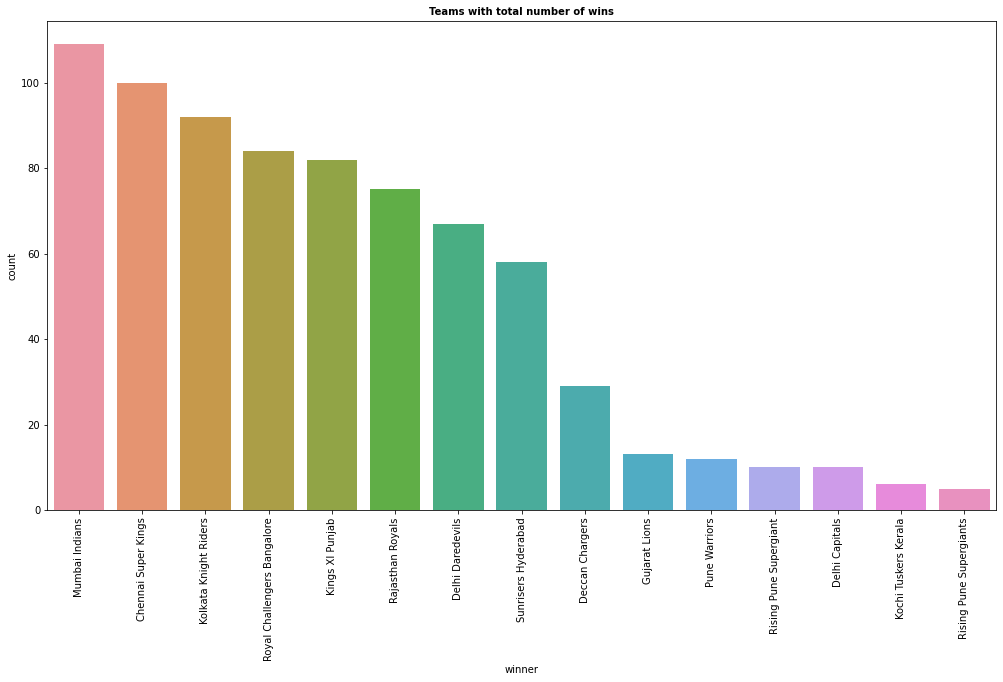

In [30]:

plt.figure(figsize=(17,9))
sns.countplot(data['winner'],order=data['winner'].value_counts().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.style.use('dark_background')
plt.title('Teams with total number of wins',fontsize=10,fontweight='bold')

C:\Users\fc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of Matches played in Season')

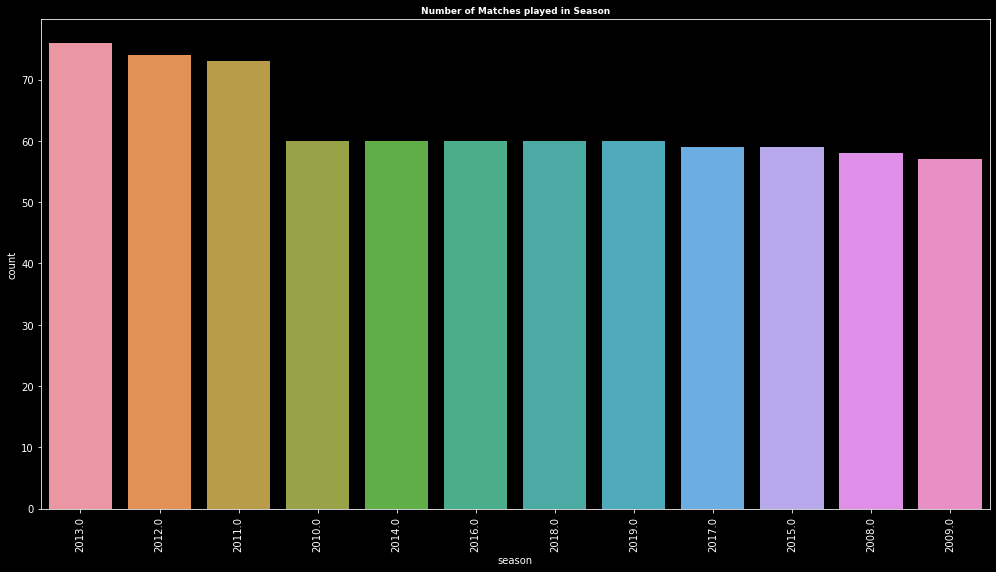

In [31]:
#plotting graph for matches played in each season of IPL
plt.figure(figsize=(17,9))
sns.countplot(data['season'],order=data['season'].value_counts().sort_values(ascending=False).index)
plt.xticks(rotation=90)
plt.title('Number of Matches played in Season',fontsize=9,fontweight='bold')

Text(0.5, 1.0, 'Number of stadiums in different cities')

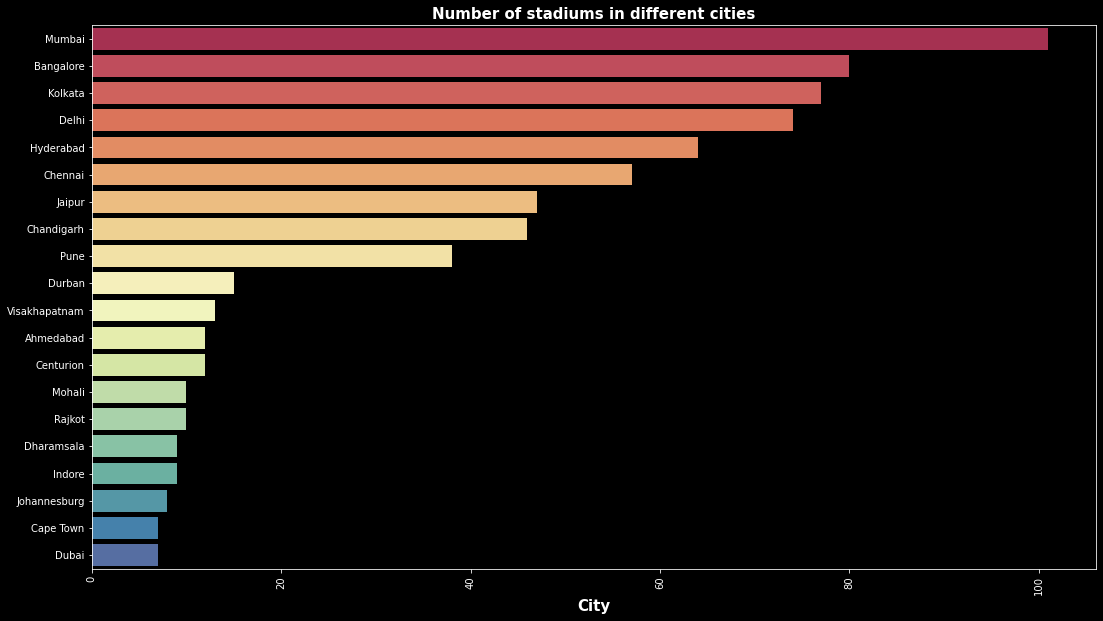

In [32]:
#plotting graph for number of stadiom in different cities
plt.figure(figsize=(18,10))
sns.barplot(data=data,y=data["city"].value_counts().iloc[:20].index,x=data["city"].value_counts().iloc[:20]
            ,palette="Spectral",label="city")
plt.xticks(rotation=90)
plt.xlabel('City', fontsize=15, fontweight='bold')
plt.title('Number of stadiums in different cities',fontsize=15,fontweight='bold')

Text(0.5, 1.0, 'Season wise toss decision ')

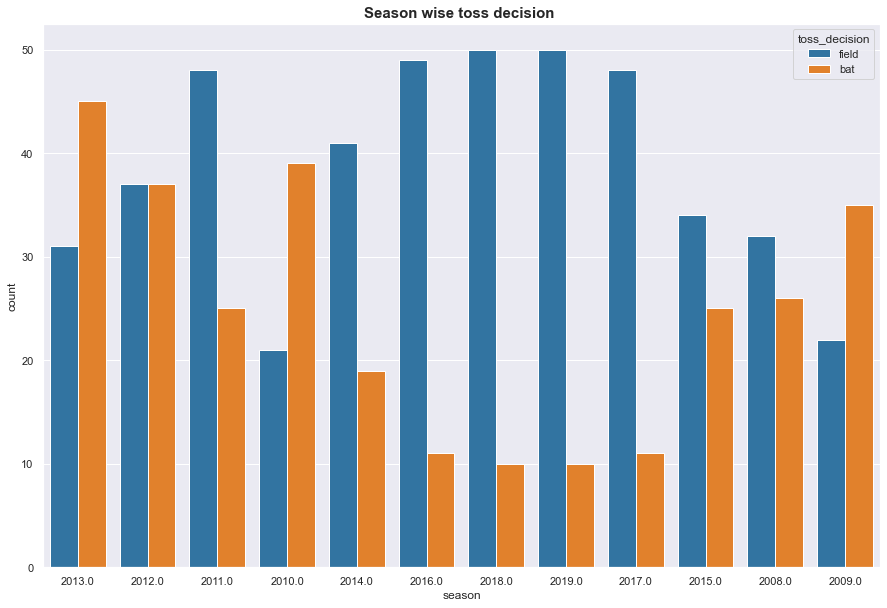

In [34]:
#plotting graph between season and toss_decision
sns.set(rc={'figure.figsize':(15,10)})
sns.countplot(x=data['season'],palette="tab10", hue=data['toss_decision'],order=data['season'].value_counts().sort_values(ascending=False).index)
plt.title('Season wise toss decision ',fontsize=15,fontweight='bold')

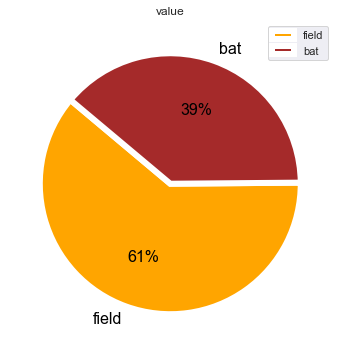

Around 60% times captain took decision field after winning the toss


In [35]:
# we will plot pie chart on Toss decision
value=data.toss_decision.value_counts()
label=np.array(value.index)
sizes = value.values
plt.figure(figsize=[10,6])
colors = ( "orange", "brown")
plt.pie(sizes,labels=label,
        startangle = 140,
        textprops = {'color': 'black','fontsize':16},
        wedgeprops = {'linewidth': 6},
        center = (0.1,0.1),
        autopct = '%0.0f%%',colors=colors)
plt.title("value")
plt.legend()
plt.show()
print('Around 60% times captain took decision field after winning the toss')

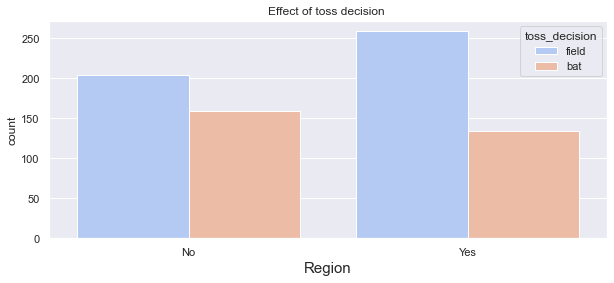

when teams winning the tosses and choose field have won matches most of the times. 


In [36]:
data['toss_win_game_win'] = np.where((data.toss_winner == data.winner),'Yes','No')
plt.figure(figsize=(10,4))
sns.countplot(x=data['toss_win_game_win'], hue=data['toss_decision'],palette="coolwarm")
plt.title('Effect of toss decision ')
plt.xlabel('Region',fontsize=15)
plt.show()
print('when teams winning the tosses and choose field have won matches most of the times. ')

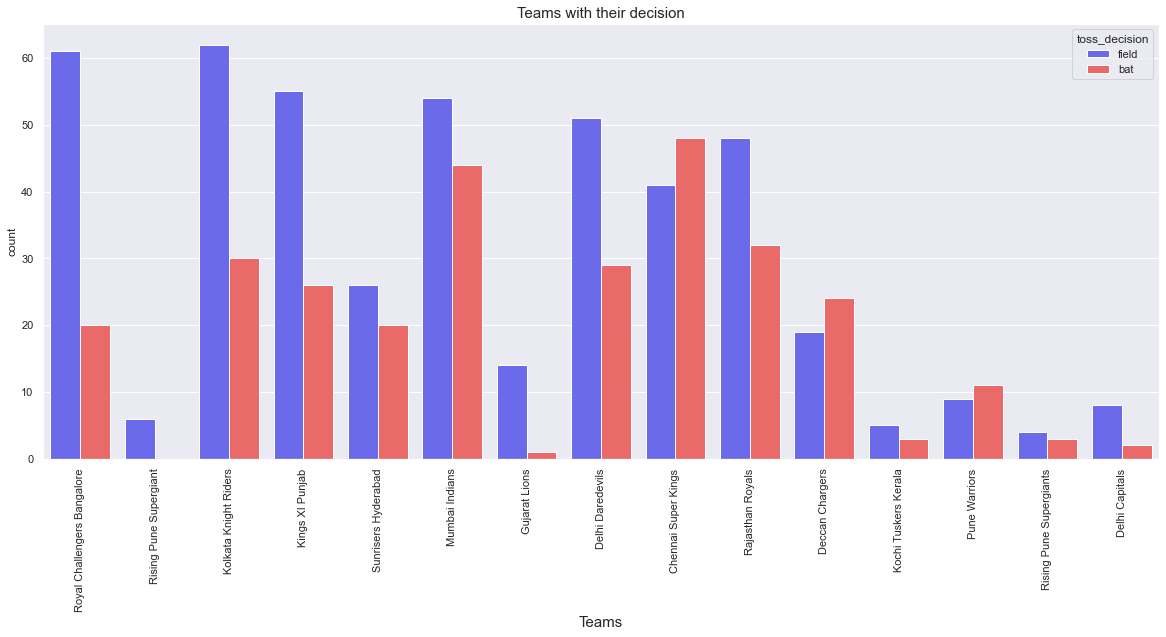

Most of the teams choose field first after winning the toss except PUNE WARRIORS & CHENNAI SUPER KINGS


In [39]:
sns.set(rc={'figure.figsize':(20,8)})
sns.countplot(x=data['toss_winner'], hue=data['toss_decision'],palette="seismic")
plt.title('Teams with their decision', fontsize=15)
plt.xticks(rotation=90)
plt.xlabel('Teams',fontsize=15)
plt.show()
print('Most of the teams choose field first after winning the toss except PUNE WARRIORS & CHENNAI SUPER KINGS')

C:\Users\fc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


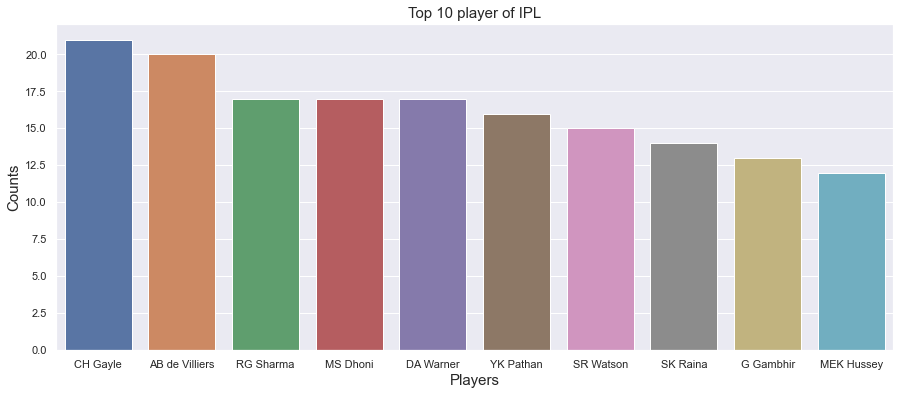

In [40]:
# All the top 10 batsman according to the match result
plt.figure(figsize=(15,6))
sns.barplot(data['player_of_match'].value_counts()[:10].index,data['player_of_match'].value_counts()[:10].values)
plt.title('Top 10 player of IPL',fontsize=15)
plt.ylabel('Counts',fontsize=15)
plt.xlabel('Players',fontsize=15)
plt.show()

In [41]:
# we will print winner season wise
season=data.drop_duplicates(subset=['season'], keep='last')

season[['season','winner']].reset_index(drop=True).sort_values('season')

,season,winner
1,2008.0,Rajasthan Royals
2,2009.0,Deccan Chargers
3,2010.0,Chennai Super Kings
4,2011.0,Chennai Super Kings
5,2012.0,Kolkata Knight Riders
6,2013.0,Mumbai Indians
7,2014.0,Kolkata Knight Riders
8,2015.0,Mumbai Indians
9,2016.0,Sunrisers Hyderabad
0,2017.0,Mumbai Indians


In [42]:
# we will print number of season won by teams
season["winner"].value_counts()

Mumbai Indians           4
Chennai Super Kings      3
Kolkata Knight Riders    2
Rajasthan Royals         1
Deccan Chargers          1
Sunrisers Hyderabad      1
Name: winner, dtype: int64

Text(0, 0.5, 'Total Runs Scored')

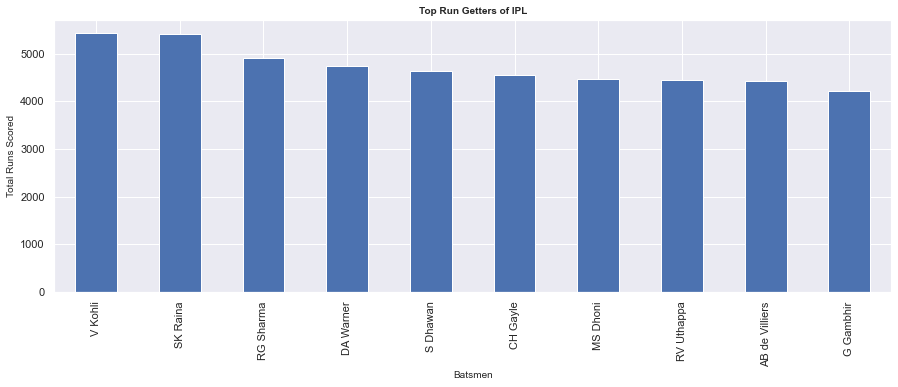

In [43]:
# All the top 10 batsman according to the match result
data.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False)[:10].plot(kind = 'bar',
                                                                                            figsize = (15,5))
plt.title("Top Run Getters of IPL", fontsize = 10, fontweight = 'bold')
plt.xlabel("Batsmen", size = 10)
plt.ylabel("Total Runs Scored", size = 10)

Text(0, 0.5, 'Total Wickets Taken')

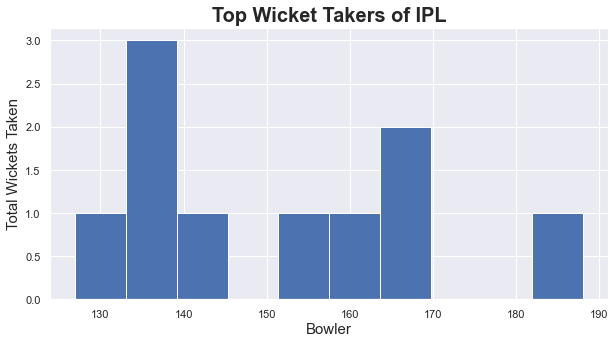

In [44]:
#this is the graph of top 10 bowler amd wicket taker
data.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False)[:10].plot(kind = 'hist',figsize=(10,5))
plt.title("Top Wicket Takers of IPL", fontsize = 20, fontweight = 'bold')
plt.xlabel("Bowler", size = 15)
plt.ylabel("Total Wickets Taken", size = 15)

In [45]:
#we will print number of 6 hit by team
six=result[result['batsman_runs']==6]
six.groupby('batting_team')['batsman_runs'].agg([('runs by six','sum'),('sixes','count')])

NameError: name 'result' is not defined

In [46]:
# we will print numbers of fours hit by team
f=data[data['batsman_runs']==4]
f.groupby('batting_team')['batsman_runs'].agg([('runs by fours','sum'),('fours','count')])

,runs by fours,fours
batting_team,,
Chennai Super Kings,8772.0,2193
Deccan Chargers,3828.0,957
Delhi Capitals,968.0,242
Delhi Daredevils,8632.0,2158
Gujarat Lions,1840.0,460
Kings XI Punjab,9832.0,2458
Kochi Tuskers Kerala,680.0,170
Kolkata Knight Riders,9736.0,2434
Mumbai Indians,10352.0,2588


In [47]:
# we will print no of matches played by batsman
player= data[["match_id","player_dismissed"]]
player =player.groupby("player_dismissed")["match_id"].count().reset_index().sort_values(by="match_id",ascending=False).reset_index(drop=True)
player.columns=["batsman","No_of Matches"]
player[:10]

,batsman,No_of Matches
0,SK Raina,162
1,RG Sharma,155
2,RV Uthappa,153
3,V Kohli,143
4,S Dhawan,137
5,G Gambhir,136
6,KD Karthik,135
7,PA Patel,126
8,AM Rahane,116
9,AT Rayudu,115


C:\Users\fc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


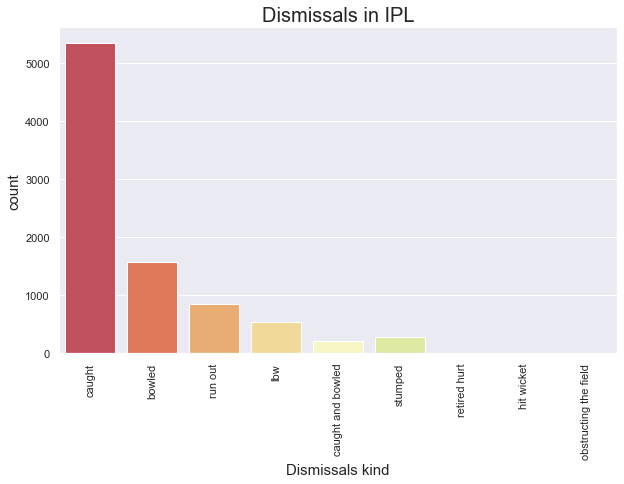

In [48]:
# Dismissals in IPL
plt.figure(figsize=(10,6))
ax=sns.countplot(data.dismissal_kind,palette="Spectral")
plt.title("Dismissals in IPL",fontsize=20)
plt.xlabel("Dismissals kind",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [49]:
#top 10 bowler of dot balls

b = data.bowler[data.total_runs==0].value_counts()[:10]
b

Harbhajan Singh    1244
SL Malinga         1144
B Kumar            1116
A Mishra           1108
PP Chawla          1100
P Kumar            1075
R Ashwin           1067
SP Narine          1038
DW Steyn            996
UT Yadav            942
Name: bowler, dtype: int64

In [50]:

field=data['fielder'].value_counts()[:10]
field

MS Dhoni          159
KD Karthik        152
RV Uthappa        125
SK Raina          115
AB de Villiers    114
PA Patel           97
RG Sharma          92
V Kohli            90
KA Pollard         85
NV Ojha            82
Name: fielder, dtype: int64

In [51]:

host=data.groupby('venue')['city'].value_counts().sort_values(ascending=False)[:10]

host

venue                                       city      
Eden Gardens                                Kolkata       77
Wankhede Stadium                            Mumbai        73
M Chinnaswamy Stadium                       Bangalore     73
Feroz Shah Kotla                            Delhi         67
Rajiv Gandhi International Stadium, Uppal   Hyderabad     56
MA Chidambaram Stadium, Chepauk             Chennai       49
Sawai Mansingh Stadium                      Jaipur        47
Punjab Cricket Association Stadium, Mohali  Chandigarh    35
Maharashtra Cricket Association Stadium     Pune          21
Subrata Roy Sahara Stadium                  Pune          17
Name: city, dtype: int64

In [52]:


match = data['result'].value_counts()
match

normal       743
tie            9
no result      4
Name: result, dtype: int64

In [53]:
# checking super overs

superover=data['is_super_over'].value_counts()
superover

0.0    178997
1.0        81
Name: is_super_over, dtype: int64

In [54]:

superover=data['is_super_over'].replace(to_replace=1, value='yes',inplace=True)
supweover=data['is_super_over'].replace(to_replace=0, value='no',inplace=True)

In [55]:
# checking super overs

superover=data['is_super_over'].value_counts()
superover

no     178997
yes        81
Name: is_super_over, dtype: int64